In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("gym_track.csv")

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [5]:
df.describe

<bound method NDFrame.describe of      Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workou

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

df['Workout_Type'] = le.fit_transform(df['Workout_Type'])

In [20]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test= train_test_split(df.drop(columns=['Workout_Type']), df['Workout_Type'], test_size=0.3,
                                                          random_state=50)

In [23]:
print(X_train)

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
503   40       1         52.1        1.61      198      128           70   
541   40       1         76.9        1.92      179      137           68   
398   18       0         58.1        1.61      175      150           71   
44    37       1        124.2        1.76      168      158           50   
8     28       1        121.7        1.94      185      127           52   
..   ...     ...          ...         ...      ...      ...          ...   
289   47       1         82.1        1.84      185      136           65   
109   57       0         78.4        1.62      185      149           52   
907   34       1        102.1        1.71      185      135           72   
480   21       1        101.5        1.95      171      131           69   
688   30       0         62.7        1.67      164      162           70   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
503                  

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [25]:
rfc.score(X_test,y_test)

0.2842465753424658

In [26]:
y_pred=rfc.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.33      0.27      0.30        94
           1       0.21      0.35      0.26        43
           2       0.26      0.35      0.30        65
           3       0.37      0.22      0.28        90

    accuracy                           0.28       292
   macro avg       0.29      0.30      0.28       292
weighted avg       0.31      0.28      0.29       292



## CAR EVALUATION

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df_car=pd.read_csv('car_eval.csv')

df_car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [30]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [31]:
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [32]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [35]:
for col in col_names:
    print(df_car[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [37]:
y= df_car['class']

In [38]:
X=df_car.drop(columns='class')

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [41]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/82.0 kB ? eta -:--:--
   -------------- ------------------------- 30.7/82.0 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------  81.9/82.0 kB 919.0 kB/s eta 0:00:01
   ---------------------------------------- 82.0/82.0 kB 658.4 kB/s eta 0:00:00


In [44]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [63]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc_car= RandomForestClassifier()

rfc_car.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred= rfc_car.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         acc       0.92      0.84      0.88       130
        good       0.41      0.64      0.50        11
       unacc       0.98      0.98      0.98       363
       vgood       0.61      0.93      0.74        15

    accuracy                           0.93       519
   macro avg       0.73      0.85      0.77       519
weighted avg       0.95      0.93      0.94       519



In [58]:
rfc_100 = RandomForestClassifier(n_estimators=60, random_state=10)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees :',(classification_report(y_pred_100,y_test)))

Model accuracy score with 100 decision-trees :               precision    recall  f1-score   support

         acc       0.91      0.82      0.86       130
        good       0.47      0.73      0.57        11
       unacc       0.98      0.97      0.97       363
       vgood       0.61      0.93      0.74        15

    accuracy                           0.93       519
   macro avg       0.74      0.86      0.79       519
weighted avg       0.94      0.93      0.93       519



In [67]:
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.267605
persons     0.230201
buying      0.177239
maint       0.152657
lug_boot    0.099689
doors       0.072608
dtype: float64

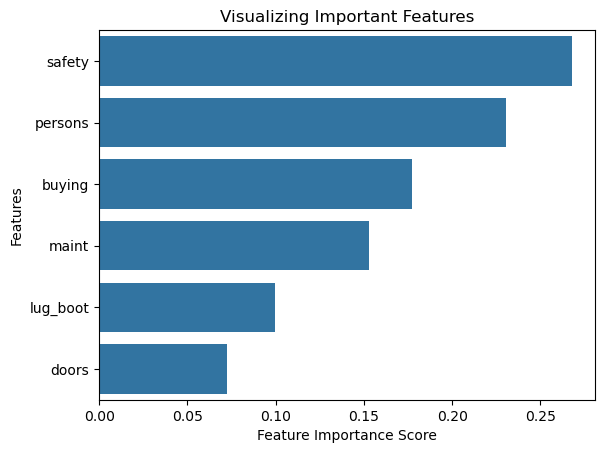

In [68]:
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[109   2   7   0]
 [  8   7   1   1]
 [  6   0 355   0]
 [  7   2   0  14]]


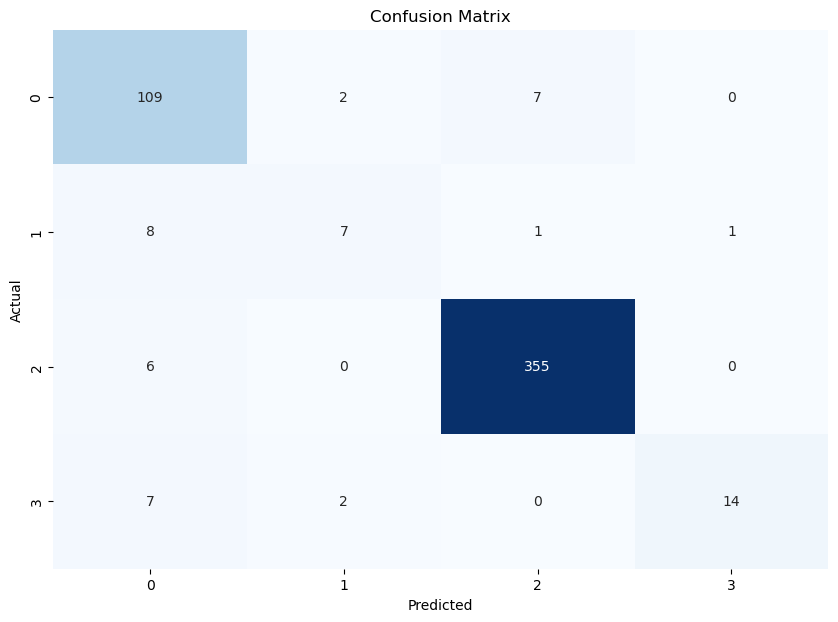

In [62]:

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()